# ML 1 (Self studies)

## Ordinary Least Squares

Coming from an **overdetermined system** (System with more equations than unknowns), a model can be made to predict the values. The difference between an observed value and a value given by such a model is called a **residual**.  
The method of **least squares** is used to minimize the sum of the squares of the residuals made in the results of each individual equation in the system.
The **ordinary least squares**(OLS) is used for estimating the unknown parameters in a linear regression model.  
In a 2d model, the response variable *$y_i$* is given by a linear equation of the form *$y = mx + b$*, written as *$y(w, x) = w_0 + w_1x_1$*.  
the vector w is the vector of unknown parameters, *$w = (w_1, w_2, ..., w_n)$*, with X being the matrix nxm of values and y the matrix of response variables. The general form is: $$y = Xw$$ (Xw - y)  
The general equation for coefficients that minimize the cost function has the form: $$\theta = (X^TX)^{-1}X^Ty$$

We can test this equation using numpy

The OLS method has a complexity of *$O(n_{samples}n^2_{features})$*, where $n_{samples} \geq n_{features}$. The matrix inversion $(X^TX)^{-1}$ has *$O(n^3)$* complexity but the scikit learn inversion has a lesser complexity of *$O(n^2)$*


Matplotlib is building the font cache; this may take a moment.


[[4.17986451]
 [2.6145382 ]]


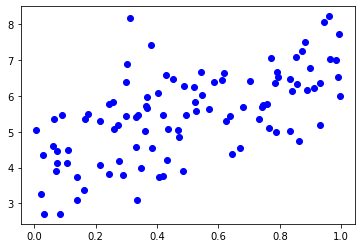

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# base equation
X = np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

# computing theta
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# X_b.T => transpose of X_b
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

plt.scatter(X, y, color="blue")
plt.show()


In [3]:
# Making predictions

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.17986451],
       [9.40894092]])

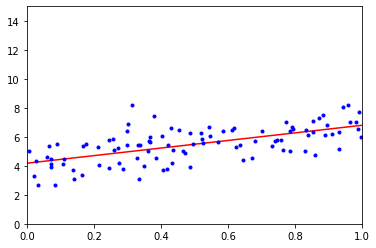

In [4]:
# Plottin the predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 1, 0, 15]) # [xmin, xmax, ymin, ymax]
plt.show()

## Sci-kit Learn implementation
the function fit receives X and y in the form fit(X, y) and the propertie coef_ gives the vector w of minimum coefficients.  
Scikit learn uses the "least squares" function of scipy, which in turn uses an *pseudoinverse* (Moore-Penrose inverse) with the form $\theta = X^+y$ (This approach of pseudoinverses is more efficient and can be used even if $X^TX$ is not inversible (det !=0))

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

### Sklearn example


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


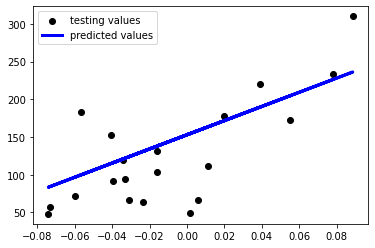

In [7]:
# load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2] #np.newaxis => takes array and transforms it in a matrix

#------------------------------data splitting

# split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

#------------------------------regression

# linear regression
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# make predictions using the testing set
# Using the coefficients, it predicts the y through the x
diabetes_y_pred = regr.predict(diabetes_X_test)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

plt.scatter(diabetes_X_test, diabetes_y_test, color="black", label="testing values") #pontos originais
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3, label="predicted values") #plotting da predição
plt.legend()

plt.show()




### Bibliography

https://en.wikipedia.org/wiki/Ordinary_least_squares  
https://en.wikipedia.org/wiki/Coefficient_of_determination  
https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse  
https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra

https://scikit-learn.org/stable/modules/linear_model.html  
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Hands-On machine learning wich Scikit-Learn and TensorFlow pp.113-119 (From now on Géron[2019]

## Ridge Regression

The Ridge regression (Also called *Tikhonov regularization*) is a type of regression which adresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.

### Multicollinearity
OLS have a problem with **multicollinearity**, where an independent variable can be predicted from another independent variable in a regression model. Because the variables are highly correlated, the individual effects of each variable in y cannot be easily distinguished  
Many methods are used to detect multicollinearity, being one of them the **variance inflation factor**, defined as: $$VIF = \frac{1}{1-R_j^2}$$ where $R_j$ is the coefficient of determination of a regression explanator j.  
If VIF is above 5 or 10, the dataset has a multicollinearity problem

### Ridge

The ridge coefficients are multiplied by an **amout of shrinkage** $\alpha$, where $\alpha \geq 0$. The larger its value, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity  
The matrix of coefficients can be written as $$\beta_{ridge} = (X^TX + \alpha I_p)^{-1}X^Ty$$ Where Ip is the pxp identity matrix.  
If $\alpha$ is very large, then all wieghts end up very close to zero and the result is a flat line going through the data's mean

### Scikit learn implementation

In [8]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = 0.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.coef_

array([0.34545455, 0.34545455])

### Sklearn example 1 (plot ridge coefficients as a function)

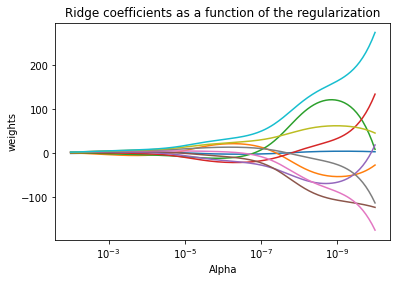

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []

for a in alphas:
  ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
  ridge.fit(X, y)
  coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis
plt.xlabel("Alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()


### Common pitfalls

In [10]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

In [12]:
survey

{'data':      EDUCATION SOUTH     SEX  EXPERIENCE       UNION   AGE      RACE  \
 0          8.0    no  female        21.0  not_member  35.0  Hispanic   
 1          9.0    no  female        42.0  not_member  57.0     White   
 2         12.0    no    male         1.0  not_member  19.0     White   
 3         12.0    no    male         4.0  not_member  22.0     White   
 4         12.0    no    male        17.0  not_member  35.0     White   
 ..         ...   ...     ...         ...         ...   ...       ...   
 529       18.0    no    male         5.0  not_member  29.0     White   
 530       12.0    no  female        33.0  not_member  51.0     Other   
 531       17.0    no  female        25.0      member  48.0     Other   
 532       12.0   yes    male        13.0      member  31.0     White   
 533       16.0    no    male        33.0  not_member  55.0     White   
 
        OCCUPATION         SECTOR       MARR  
 0           Other  Manufacturing    Married  
 1           Other  

In [13]:
X = survey.data[survey.feature_names]
X.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [14]:
X.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,35.0,White,Other,Other,Married


In [15]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

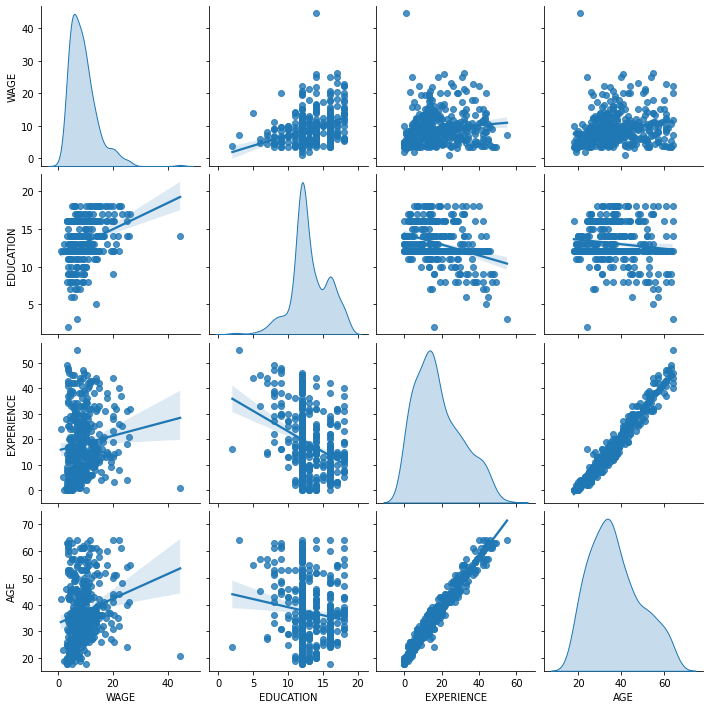

In [17]:
train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

In [18]:
# check the type of data that we are dealing with
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   AGE         534 non-null    float64 
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), float64(3)
memory usage: 17.2 KB


## Linear regression without framework

In [19]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv")

In [20]:
data_female = data[data.Gender == "Female"]
X = data_female.Weight
y = data_female.Height

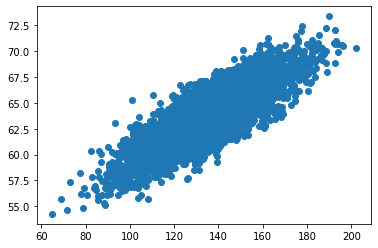

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [22]:
Xmean = X.mean()
Xmean

135.86009300746835

In [23]:
data_female['diffx'] = Xmean - X
data_female

C:\Users\Mateus\AppData\Local\Temp\ipykernel_9696\3620538690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_female['diffx'] = Xmean - X


,Gender,Height,Weight,diffx
5000,Female,58.910732,102.088326,33.771767
5001,Female,65.230013,141.305823,-5.445730
5002,Female,63.369004,131.041403,4.818690
5003,Female,64.479997,128.171511,7.688582
5004,Female,61.793096,129.781407,6.078686
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.917361
9996,Female,67.067155,170.867906,-35.007813
9997,Female,63.867992,128.475319,7.384774
9998,Female,69.034243,163.852461,-27.992368


In [24]:
data_female["diffx_squared"] = data_female.diffx**2
SSxx = data_female.diffx_squared.sum()

C:\Users\Mateus\AppData\Local\Temp\ipykernel_9696\1315967340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_female["diffx_squared"] = data_female.diffx**2


In [25]:
ymean = y.mean()

In [26]:
data_female['diffy'] = ymean - y

C:\Users\Mateus\AppData\Local\Temp\ipykernel_9696\450541442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_female['diffy'] = ymean - y


In [27]:
SSxy = (data_female.diffx * data_female.diffy).sum()

In [28]:
m = SSxy/SSxx
m

0.12042528278366127

In [29]:
b = ymean - m * Xmean
b

47.34778348398618

In [30]:
def predict(value):
  predict = m*value + b
  return predict

predict(140)

64.20732307369876

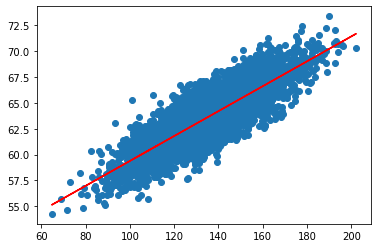

In [31]:
plt.scatter(X, y)
plt.plot(X, predict(X), "r")

### Bibliography
https://en.wikipedia.org/wiki/Ridge_regression#:~:text=Ridge%20regression%20is%20a%20method,econometrics%2C%20chemistry%2C%20and%20engineering.
https://en.wikipedia.org/wiki/Multicollinearity

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Multicollinearity%20occurs%20when%20two%20or,variable%20in%20a%20regression%20model.

Géroin[2019] pp.137-139
